In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from path import Path
import numpy as np

In [2]:
# File to Load 
file = "methane_hist_emissions.csv"
methane_emissions = pd.read_csv(file, index_col=0)

In [3]:
methane_emissions.head()

,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,827.98,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,824.27,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,677.00,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [4]:
# Drop unused columns
methane_emissions_df = methane_emissions.drop(columns=["Gas", "Unit"], axis =1)
methane_emissions_df.head()

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [5]:
# Explore null emissions values
methane_emissions_df.isnull().sum()

Sector    0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
2005      0
2004      0
2003      0
2002      0
2001      0
2000      0
1999      0
1998      0
1997      0
1996      0
1995      0
1994      0
1993      0
1992      0
1991      0
1990      9
dtype: int64

In [6]:
# Create a list of countries from methane_emission_df 
countries = []
for country in methane_emissions_df.index.unique():
    countries.append(country)
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 

In [7]:
len(countries)

195

In [8]:
# GDP data to Load 
file = "World GDP Data.xls"
GDP = pd.read_excel(file, index_col=0)
GDP.head()

,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [9]:
# Drop unused GDP columns
GDP_df = GDP.drop(columns = ["Indicator Name", "Indicator Code", "2019", "2020"])
GDP_df

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09
Africa Eastern and Southern,AFE,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,2.822135e+11,2.658377e+11,...,7.125580e+11,8.474095e+11,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Africa Western and Central,AFW,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,...,5.069964e+11,5.915830e+11,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11
Angola,AGO,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.015895e+09,5.344014e+09,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09
"Yemen, Rep.",YEM,5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,ZAF,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [10]:
# Explore null GDP values
GDP_df.isnull().sum()

Country Code     0
1990            41
1991            46
1992            42
1993            39
1994            35
1995            26
1996            26
1997            26
1998            24
1999            23
2000            19
2001            18
2002            13
2003            13
2004            13
2005            13
2006            12
2007            12
2008            11
2009            11
2010            10
2011             8
2012             9
2013             8
2014             8
2015             9
2016            10
2017            10
2018            10
dtype: int64

In [11]:
# Drop rows with countries that don't have emission data
GDP_df_same = GDP_df[GDP_df.index.isin(countries)]
GDP_df_same

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,AGO,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,ALB,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,AND,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,ARE,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,7.567434e+10,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,WLD,2.269924e+13,2.368028e+13,2.538286e+13,2.582013e+13,2.787426e+13,3.104337e+13,3.173630e+13,3.161983e+13,3.153976e+13,...,6.073036e+13,6.648828e+13,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13
Samoa,WSM,1.257663e+08,1.255972e+08,1.323030e+08,1.331229e+08,2.210981e+08,2.248657e+08,2.499090e+08,2.854756e+08,2.694815e+08,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
South Africa,ZAF,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [12]:
# See what countries have probably different spelling
GDP_rest = GDP_df[~GDP_df.index.isin(countries)]
sorted(GDP_rest.index.unique())

['Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Arab World',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Polynesia',
 'Gambia, The',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong SAR, China',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Iran, Islamic Rep.',
 '

In [13]:
# Correct spelling in GDP_df
GDP_clean = GDP_df.rename(index={'Bahamas, The': "Bahamas", 
                                 'Brunei Darussalam': "Brunei", 
                                 'Egypt, Arab Rep.': "Egypt", 
                                 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran',
                                 'Micronesia, Fed. Sts.': 'Micronesia',
                                 'Russian Federation': 'Russia',
                                 'Syrian Arab Republic': 'Syria',
                                 'Venezuela, RB': 'Venezuela',
                                 'Yemen, Rep.': 'Yemen'})

In [14]:
# Correct spelling in methate_emissions_df
methane_clean = methane_emissions_df.rename(index={'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                                                  'Kyrgyzstan': 'Kyrgyz Republic',
                                                  'Laos': 'Lao PDR',
                                                  'Republic of Congo': 'Congo, Rep.',
                                                  'Saint Kitts and Nevis': 'St. Kitts and Nevis',
                                                  'Saint Lucia': 'St. Lucia',
                                                  'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
                                                  'Slovakia': 'Slovak Republic',
                                                  'European Union (27)': 'European Union'})

In [15]:
# Create a list of countries with corrected spelling
all_countries = []
for country in methane_clean.index.unique():
    all_countries.append(country)
sorted(all_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guya

In [16]:
# Drop rows with countries that don't have emission data (with corrected country names)
GDP_same = GDP_clean[GDP_clean.index.isin(all_countries)]
GDP_same

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,AGO,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,ALB,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,AND,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,ARE,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,7.567434e+10,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,1.257663e+08,1.255972e+08,1.323030e+08,1.331229e+08,2.210981e+08,2.248657e+08,2.499090e+08,2.854756e+08,2.694815e+08,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
Yemen,YEM,5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,ZAF,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [17]:
# Check for null values in GDP_same DataFrame
GDP_same.isnull().sum()

Country Code     0
1990            22
1991            27
1992            23
1993            20
1994            17
1995             9
1996             9
1997             9
1998             9
1999             9
2000             5
2001             4
2002             3
2003             3
2004             3
2005             3
2006             3
2007             3
2008             2
2009             2
2010             1
2011             1
2012             2
2013             1
2014             1
2015             2
2016             3
2017             3
2018             3
dtype: int64

In [18]:
# Drop years with multiple missing GDP data
GDP_2000 = GDP_same.drop(columns = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999"])
GDP_2000

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,AND,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,ARE,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806175e+11,2.221165e+11,2.579161e+11,3.154746e+11,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,WSM,2.690197e+08,2.730884e+08,2.880789e+08,3.388386e+08,4.203202e+08,4.655680e+08,5.058324e+08,5.704692e+08,6.192607e+08,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
Yemen,YEM,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,3.161321e+11,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [19]:
# Exporting merged_transposed data in csv to get null values
# GDP_2000.to_csv("GDP_2000.csv", index = True)

In [20]:
# Read in normalized GDP data after filling in the NaNs, deleting of South Sudan and dividing by 1000000000
file = "GDP_2000_normalized.csv"
GDP_2000_normalized = pd.read_csv(file, index_col=0)
GDP_2000_normalized['country_code'] = GDP_2000['Country Code']
GDP_2000_normalized

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,country_code
Country Name,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.532000,2.462000,4.055180,4.515559,5.226779,6.209138,6.971286,9.747880,10.109305,12.416161,15.856679,17.805113,19.907317,20.146405,20.497127,19.134212,18.116562,18.753470,18.053229,AFG
Angola,9.129635,8.936064,15.285595,17.812705,23.552052,36.970919,52.381007,65.266452,88.538611,70.307164,83.799497,111.789687,128.052854,136.709863,145.712200,116.193649,101.123851,122.123822,101.353231,AGO
Albania,3.480355,3.922101,4.348068,5.611496,7.184686,8.052074,8.896073,10.677324,12.881354,12.044208,11.926923,12.890765,12.319830,12.776221,13.228148,11.386850,11.861200,13.019689,15.156432,ALB
Andorra,1.429049,1.546926,1.755910,2.361727,2.894922,3.159905,3.456442,3.952601,4.085631,3.674410,3.449967,3.629204,3.188809,3.193704,3.271808,2.789870,2.896679,3.000181,3.218316,AND
United Arab Emirates,104.337372,103.311641,109.816202,124.346358,147.824370,180.617468,222.116542,257.916133,315.474616,253.547359,289.787338,350.666031,374.590606,390.107556,403.137100,358.135058,357.045065,385.605507,422.215044,ARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.269020,0.273088,0.288079,0.338839,0.420320,0.465568,0.505832,0.570469,0.619261,0.584706,0.663156,0.737148,0.760319,0.770060,0.756806,0.787959,0.799494,0.832026,0.821287,WSM
Yemen,9.652436,9.861560,10.694628,11.777967,13.872792,16.746345,19.061979,21.650532,26.910851,25.130274,30.906750,32.726417,35.401342,40.415236,43.228585,42.445102,31.317365,26.840129,21.606141,YEM
South Africa,151.753369,135.429607,129.088132,197.020241,255.806631,288.868489,303.860874,333.075463,316.132139,329.753049,417.365077,458.201514,434.400545,400.886014,381.198870,346.709790,323.585510,381.448815,404.842117,ZAF


In [21]:
# Exporting GDP data in csv to create a geojson file
# GDP_2000_normalized.to_csv("GDP_country_code.csv", index = True)

In [22]:
# Create a list of countries from methane_clean dataframe
same_countries = []
for country in GDP_2000_normalized.index.unique():
    same_countries.append(country)
sorted(same_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland'

In [23]:
# Filter methane_clean dataframe for same country names as in GDP_same dataframe
methane_same = methane_clean[methane_clean.index.isin(same_countries)]
len(methane_same.index.unique())

187

In [24]:
# Drop years with multiple missing GDP data
methane_2000 = methane_same.drop(columns = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999"])
methane_2000

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Country,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,1019.28,974.42,921.86,883.58,837.94,830.23,816.62,820.09,824.52,830.59
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,1018.91,973.58,921.56,883.36,837.67,829.70,815.91,819.89,824.17,829.61
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,776.75,798.54,792.59,783.56,767.29,756.60,723.10,671.19,643.60,623.67
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,774.47,793.09,791.13,780.69,765.48,752.80,719.38,669.09,642.04,617.06
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,552.07,510.49,468.91,427.33,385.75,371.98,358.21,344.44,330.67,316.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,Land-Use Change and Forestry,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Samoa,Fugitive Emissions,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yemen,Industrial Processes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
# Exporting merged_transposed data in csv to get null values
# methane_2000.to_csv("methane.csv", index = True)

In [26]:
# Transpose indices and column headers in methane emission dataframe
df_transposed = methane_2000.copy(deep=True)
df_transposed = df_transposed.groupby([df_transposed.index,'Sector']).mean().transpose()
df_transposed.head()

Country Afghanistan                                                 \
Sector  Agriculture Energy Fugitive Emissions Industrial Processes   
2018          10.45  67.91               2.22                  0.0   
2017          10.33  66.21               2.21                  0.0   
2016          10.63  64.51               2.19                  0.0   
2015          10.85  62.82               2.18                  0.0   
2014          11.48  53.45               1.98                  0.0   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                             0.0                 65.69   
2017                             0.0                 64.00   
2016                             0.0                 62.32   
2015                             0.0                 60.64   
2014                             0.0                 51.47   

Country                                                     Albania  ...  \
Sector  Total excluding LUCF Total including LUCF Waste Agriculture  ...   
2018                   81.51                81.51  3.15        2.01  ...   
2017                   79.61                79.61  3.08        2.05  ...   
2016                   78.15                78.15  3.00        2.10  ...   
2015                   76.59                76.59  2.93        2.11  ...   
2014                   67.77                67.77  2.84        2.10  ...   

Country Zambia    Zimbabwe                                                 \
Sector   Waste Agriculture Energy Fugitive Emissions Industrial Processes   
2018      3.42        6.43   2.52               0.71                 0.48   
2017      3.32        6.23   2.48               0.70                 0.48   
2016      3.21        6.14   2.44               0.68                 0.48   
2015      3.10        6.64   2.40               0.66                 0.48   
2014      3.01        5.89   2.22               0.60                 0.48   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                            0.11                  1.81   
2017                            0.06                  1.78   
2016                            0.11                  1.76   
2015                            0.14                  1.74   
2014                            0.08                  1.61   

Country                                                  
Sector  Total excluding LUCF Total including LUCF Waste  
2018                   11.85                11.96  2.42  
2017                   11.56                11.62  2.37  
2016                   11.38                11.50  2.32  
2015                   11.79                11.93  2.27  
2014                   10.82                10.90  2.23  

[5 rows x 1676 columns]

In [27]:
# Transpose indices and column headers in GDP dataframe
gdp_transposed = GDP_2000_normalized.copy(deep=True)
gdp_transposed = gdp_transposed.transpose()
gdp_transposed = gdp_transposed.rename(columns={col:(col, 'GDP') for col in gdp_transposed.columns})
gdp_transposed.tail()

Country Name,"(Afghanistan, GDP)","(Angola, GDP)","(Albania, GDP)","(Andorra, GDP)","(United Arab Emirates, GDP)","(Argentina, GDP)","(Armenia, GDP)","(Antigua and Barbuda, GDP)","(Australia, GDP)","(Austria, GDP)",...,"(St. Vincent and the Grenadines, GDP)","(Venezuela, GDP)","(Vietnam, GDP)","(Vanuatu, GDP)","(World, GDP)","(Samoa, GDP)","(Yemen, GDP)","(South Africa, GDP)","(Zambia, GDP)","(Zimbabwe, GDP)"
2015,19.134212,116.193649,11.38685,2.78987,358.135058,594.749285,10.553338,1.336693,1350.534154,381.817566,...,0.7554,323.595,193.241109,0.730871,75112.44416,0.787959,42.445102,346.70979,21.251217,19.963121
2016,18.116562,101.123851,11.8612,2.896679,357.045065,557.531376,10.546135,1.436585,1206.685107,395.568644,...,0.77443,279.249,205.276172,0.78089,76305.05887,0.799494,31.317365,323.58551,20.958413,20.548678
2017,18.75347,122.123822,13.019689,3.000181,385.605507,643.628665,11.527459,1.467978,1326.882872,416.230497,...,0.792178,143.841,223.779866,0.880044,81193.29166,0.832026,26.840129,381.448815,25.873601,17.584891
2018,18.053229,101.353231,15.156432,3.218316,422.215044,524.819743,12.457942,1.605944,1428.529571,454.945881,...,0.8113,98.4,245.213686,0.914728,86267.60063,0.821287,21.606141,404.842117,26.31159,18.115544
country_code,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,...,VCT,VEN,VNM,VUT,WLD,WSM,YEM,ZAF,ZMB,ZWE


In [28]:
# Merge methane and GDP transposet dataframes
merged = df_transposed.merge(gdp_transposed,how="left", right_index=True, left_index=True, validate="one_to_one")
cols = pd.MultiIndex.from_tuples([(x,y) for x,y in merged.columns])

merged = merged.transpose().reindex(cols)
merged.transpose().head()
#merged = merged.dropna(axis=0, how='any')


C:\Users\Oxana\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


Afghanistan                                                 \
     Agriculture Energy Fugitive Emissions Industrial Processes   
2018       10.45  67.91               2.22                  0.0   
2017       10.33  66.21               2.21                  0.0   
2016       10.63  64.51               2.19                  0.0   
2015       10.85  62.82               2.18                  0.0   
2014       11.48  53.45               1.98                  0.0   

                                                                              \
     Land-Use Change and Forestry Other Fuel Combustion Total excluding LUCF   
2018                          0.0                 65.69                81.51   
2017                          0.0                  64.0                79.61   
2016                          0.0                 62.32                78.15   
2015                          0.0                 60.64                76.59   
2014                          0.0                 51.47                67.77   

                                    Albania  ...  \
     Total including LUCF Waste Agriculture  ...   
2018                81.51  3.15        2.01  ...   
2017                79.61  3.08        2.05  ...   
2016                78.15   3.0         2.1  ...   
2015                76.59  2.93        2.11  ...   
2014                67.77  2.84         2.1  ...   

     St. Vincent and the Grenadines Venezuela     Vietnam   Vanuatu  \
                                GDP       GDP         GDP       GDP   
2018                         0.8113      98.4  245.213686  0.914728   
2017                       0.792178   143.841  223.779866  0.880044   
2016                        0.77443   279.249  205.276172   0.78089   
2015                         0.7554   323.595  193.241109  0.730871   
2014                       0.727715   203.822  186.204653  0.772316   

            World     Samoa      Yemen South Africa     Zambia   Zimbabwe  
              GDP       GDP        GDP          GDP        GDP        GDP  
2018  86267.60063  0.821287  21.606141   404.842117   26.31159  18.115544  
2017  81193.29166  0.832026  26.840129   381.448815  25.873601  17.584891  
2016  76305.05887  0.799494  31.317365    323.58551  20.958413  20.548678  
2015  75112.44416  0.787959  42.445102    346.70979  21.251217  19.963121  
2014  79557.66012  0.756806  43.228585    381.19887  27.141024   19.49552  

[5 rows x 1863 columns]

In [29]:
# Exporting merged_transposed data in csv to get null values
# merged.transpose().to_csv("merged_transposed.csv", index = True)

<AxesSubplot:>

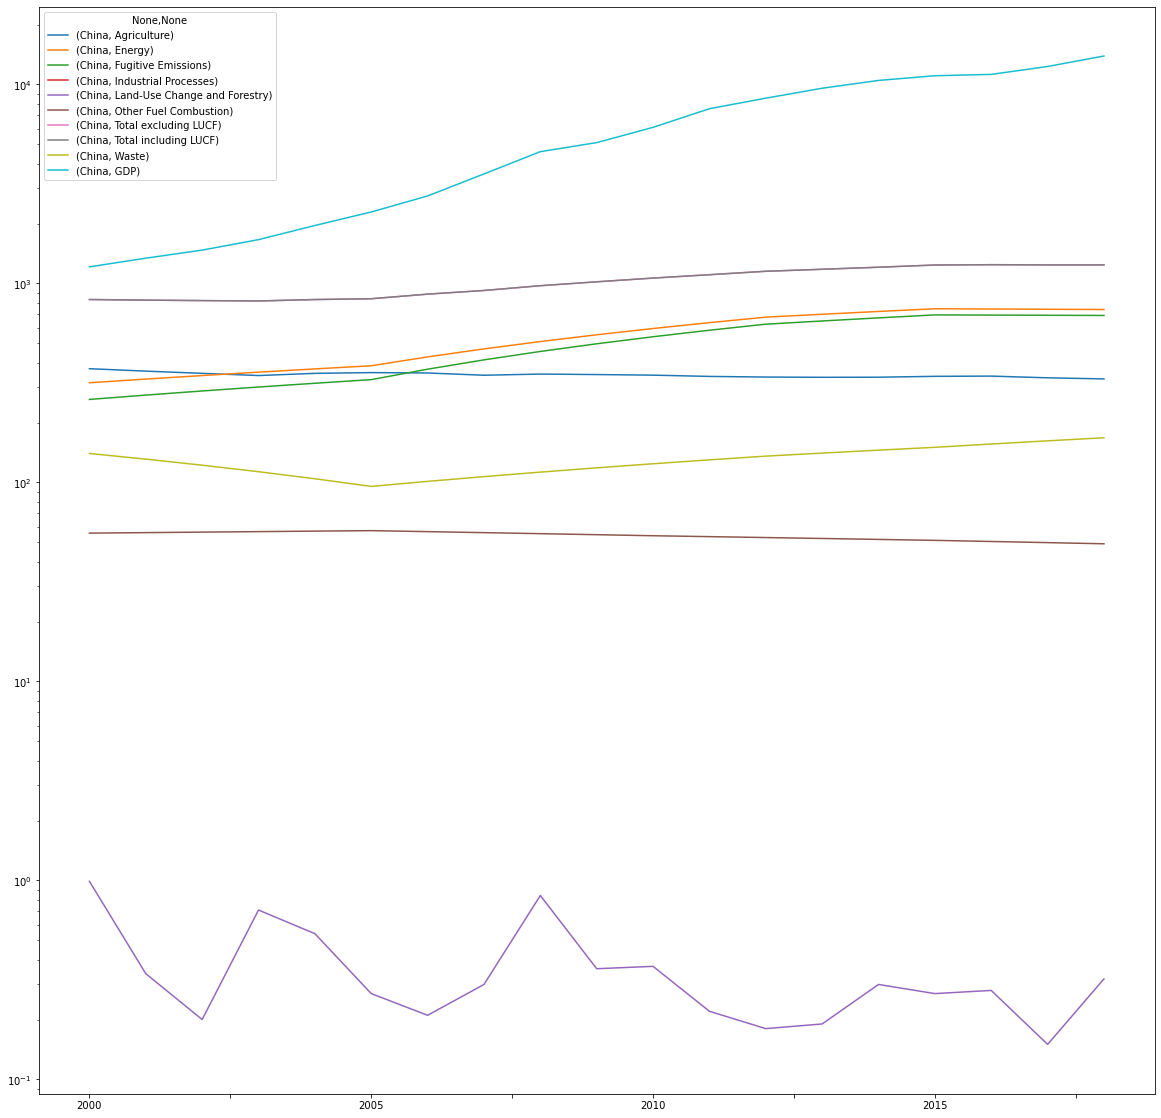

In [30]:
# Plot 
merged.xs('China', level=0 , drop_level=False).iloc[:,::-1].transpose().plot(kind="line", figsize=(20,20), legend=True, logy=True)

In [31]:
# Another way to merge the dataframes
merged_df = methane_2000.loc[methane_2000['Sector']=="Total including LUCF"].merge(GDP_2000_normalized, how='inner', left_index=True, right_index=True, validate="one_to_one", suffixes=["_gdp","_meth"])
#merged_df.dropna(how='any', axis=0, inplace=True)
merged_df

,Sector,2018_gdp,2017_gdp,2016_gdp,2015_gdp,2014_gdp,2013_gdp,2012_gdp,2011_gdp,2010_gdp,...,2010_meth,2011_meth,2012_meth,2013_meth,2014_meth,2015_meth,2016_meth,2017_meth,2018_meth,country_code
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,6087.163875,7551.500124,8532.229987,9570.406236,10475.682920,11061.553080,11233.276540,12310.409370,13894.817550,CHN
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,1524.917468,2045.925608,2208.295774,2292.473247,2059.241965,1363.481063,1276.786979,1574.199387,1657.328866,RUS
India,Total including LUCF,669.34,665.04,659.81,653.61,655.78,656.08,654.89,655.48,653.89,...,1675.615336,1823.049928,1827.637859,1856.722121,2039.127446,2103.587814,2294.797981,2651.472946,2701.111783,IND
United States,Total including LUCF,623.77,615.77,609.89,618.27,621.45,619.02,618.71,628.73,650.38,...,14992.052730,15542.581100,16197.007350,16784.849200,17527.163700,18238.300570,18745.075690,19542.979180,20611.860930,USA
Brazil,Total including LUCF,418.02,427.51,428.63,426.88,418.70,412.93,418.15,414.63,421.50,...,2208.838109,2616.156607,2465.228294,2472.819362,2456.043766,1802.212000,1795.693266,2063.514689,1916.933708,BRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kiribati,Total including LUCF,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.156120,0.181705,0.190243,0.185114,0.179703,0.171118,0.178329,0.187276,0.200157,KIR
Liechtenstein,Total including LUCF,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,5.082366,5.739977,5.456009,6.391736,6.657171,6.268392,6.237264,6.474256,6.839145,LIE
Palau,Total including LUCF,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.185943,0.196911,0.212398,0.221117,0.241670,0.280458,0.298300,0.285300,0.284700,PLW
Tuvalu,Total including LUCF,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.031824,0.038712,0.037672,0.037509,0.037291,0.035492,0.036548,0.040619,0.042588,TUV
